In [61]:
# 04_data_map.ipynb
# Creates a heatmap of Italian regions based on a dataframe read from CSV 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from pathlib import Path
import geopandas as gpd

In [62]:
def plot_italy_region_map(df_input:pd.DataFrame, region_column:str, value_column:str, output_folder:str = 'maps_data', output_filename:str='italy_region_map', plt_title:str = 'Map by Region in Italy', aggregate:bool = False):
    """
    Function to plot a map of Italy coloured by regional amounts and save it to a file. Also saves the aggregated dataframe as a CSV file.
    
    Parameters:
    df_input (pd.DataFrame): The dataframe containing regions and amounts.
    region_column (str): The name of the column with region names.
    value_column (str): The name of the column with values to be summed and linked to regions.
    output_folder (str): The folder where the output file will be saved.
    output_filename (str): The name of the output file (default is 'italy_region_map.png').
    plt_title (str): The name of the output plot.
    aggregate (bool): If True, group values by region_column, sum the value_column
    """
    # Set font to Times New Roman for all text elements
    rcParams['font.family'] = 'serif'
    rcParams['font.serif'] = 'Times New Roman'
    
    output_path_png = Path(output_folder) / f"{output_filename}.png"

    # If needed, aggregate the value_column by region_column and save it, else the aggregated data is df_input
    df_aggregated = df_input
    if aggregate:
        df_aggregated = df_input.groupby(region_column)[value_column].sum().reset_index()
        output_path_csv = Path(output_folder) / f"{output_filename}_aggregated.csv"
        df_aggregated.to_csv(output_path_csv, sep=";", index=False)
        print("Data aggregated saved to:", output_path_csv)

    # Load the shapefile of Italian regions
    # https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson
    italy_regions = gpd.read_file("limits_IT_regions.geojson")
    
    # Merge the aggregated data with the geographic dataframe
    italy_regions = italy_regions.merge(df_aggregated, how='left', left_on='reg_name', right_on=region_column)
    
    # Create the map
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    italy_regions.plot(column=value_column, cmap='OrRd', linewidth=1, ax=ax, edgecolor='0.9', legend=False)
    
    # Add titles and labels
    ax.set_title(plt_title, fontdict={'fontsize': '15', 'fontweight' : '3'})
    ax.set_axis_off()
    
    # Save the plot to the specified file
    plt.savefig(output_path_png, dpi=300, bbox_inches='tight')

    print("Map saved to:", output_path_png)
    

    plt.show()

    plt.close()

# MAIN

In [63]:
# MAIN
maps_data_dir = "maps_data" # <-- INPUT: folder with data (CSV)
maps_data_file = "lista-regression-prediction-fraction-appalti-by-region.csv" # <-- INPUT: file with data
# maps_data_file = "TENDER_NOTICE_filtered.csv" # <-- INPUT: file with data
path_data = Path(maps_data_dir) / maps_data_file

print(">> Reading data")
print("File CSV:", path_data)
df_data = None
try:
    df_data = pd.read_csv(path_data, sep = ";")
except FileNotFoundError:
    print(f"ERROR: file '{path_data}' not found.")
if df_data is not None:
    print("Data shape:", df_data.shape)
    print("Data columns:", df_data.columns)

>> Reading data
File CSV: maps_data/TENDER_NOTICE_filtered.csv
Data shape: (112269, 99)
Data columns: Index(['cig', 'cig_accordo_quadro', 'numero_gara', 'importo_complessivo_gara',
       'n_lotti_componenti', 'oggetto_lotto', 'importo_lotto',
       'oggetto_principale_contratto', 'settore', 'luogo_istat', 'provincia',
       'data_pubblicazione', 'data_scadenza_offerta',
       'cod_tipo_scelta_contraente', 'tipo_scelta_contraente',
       'cod_modalita_realizzazione', 'modalita_realizzazione', 'codice_ausa',
       'cf_amministrazione_appaltante',
       'denominazione_amministrazione_appaltante', 'sezione_regionale',
       'anno_pubblicazione', 'cod_cpv', 'descrizione_cpv', 'FLAG_PNRR_PNC',
       'cpv_division', 'accordo_quadro', 'codice_fiscale', 'partita_iva',
       'denominazione', 'natura_giuridica_codice',
       'natura_giuridica_descrizione', 'soggetto_estero', 'provincia_codice',
       'provincia_nome', 'citta_codice', 'citta_nome', 'indirizzo_odonimo',
       'cap', 'f

/var/folders/_n/gwd13q2j4zd4f80gls4mbcmw0000gn/T/ipykernel_50205/98995820.py:11: DtypeWarning: Columns (32,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data = pd.read_csv(path_data, sep = ";")


In [64]:
df_data

,cig,cig_accordo_quadro,numero_gara,importo_complessivo_gara,n_lotti_componenti,oggetto_lotto,importo_lotto,oggetto_principale_contratto,settore,luogo_istat,...,id_aggiudicazione,cod_esito,num_imprese_richiedenti,asta_elettronica,num_imprese_invitate,massimo_ribasso,minimo_ribasso,ruolo,tipo_soggetto,id_variante
0,6546647003,NaN,6299276,4235.00,1,AUDIT IN MATERIA DI RIFIUTI E SCIUREZZA,4235.00,S,ORDINARI,1272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6570005BA1,NaN,6320073,21820.00,1,INCARICO DI CONSULENZA FISCALE AMMINISTRATIVA ...,21820.00,S,ORDINARI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,6552837428,NaN,6304492,95000.00,1,INDAGINI DIAGNOSTICHE SUI SOLAI DEGLI EDIFICI ...,95000.00,S,ORDINARI,92009.0,...,991136.0,1.0,0.0,1.0,22.0,41.5,17.13,NaN,"IMPRESA SINGOLA (IMPRENDITORI INDIVIDUALI, ANC...",0
3,6553586E3D,NaN,6305155,2400.00,1,ATTIVITÀ D'IMPLEMENTAZIONE E CALIBRAZIONE DELL...,2400.00,S,ORDINARI,9056.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,8674121F14,NaN,8086326,661.85,1,LAPIS 12038 LIQUIDAZIONE INCARICO DOMICILIAZIO...,661.85,S,ORDINARI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112264,9582324FE7,NaN,8883402,56500.00,1,"SERVIZI DI ASSISTENZA MINORI, MSNA E DI CONTRA...",56500.00,S,ORDINARI,43015.0,...,2395761.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,"IMPRESA SINGOLA (IMPRENDITORI INDIVIDUALI, ANC...",1
112265,9584146F77,NaN,8885094,84000.00,1,SERVIZIO DI ALLESTIMENTO AUDIO LUCI SET SFILA...,84000.00,S,ORDINARI,58091.0,...,2398701.0,1.0,2.0,0.0,2.0,11.2,8.00,NaN,"IMPRESA SINGOLA (IMPRENDITORI INDIVIDUALI, ANC...",1
112266,9584747F6D,NaN,8885586,388455.84,1,INTERVENTI DI CONTRASTO DELLA VIOLENZA DI GENE...,388455.84,S,ORDINARI,27042.0,...,2412034.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,"IMPRESA SINGOLA (IMPRENDITORI INDIVIDUALI, ANC...",1
112267,9676661944,8222149BFD,8967598,2700000.00,1,ACCORDO QUADRO PER L'ESECUZIONE DI LAVORI DI R...,2700000.00,W,ORDINARI,NaN,...,2407790.0,1.0,0.0,0.0,0.0,NaN,NaN,MANDATARIA,ATI (RAGGRUPPAMENTI TEMPORANEI DI CONCORRENTI:...,1


In [65]:
file_name = f"{Path(maps_data_file).stem}"

Data aggregated saved to: maps_data/TENDER_NOTICE_filtered_aggregated.csv
Map saved to: maps_data/TENDER_NOTICE_filtered.png


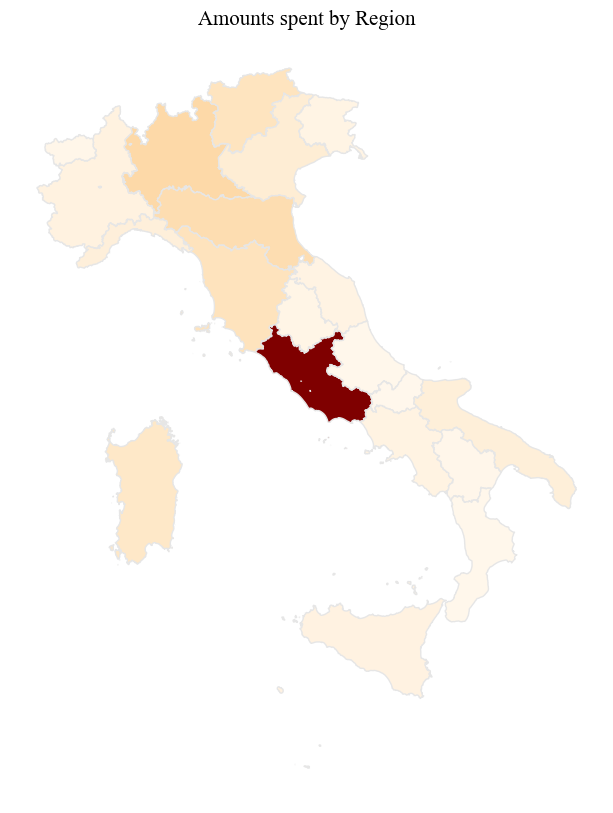

In [66]:
# plot_italy_region_map(df_data, 'region', 'predicted', maps_data_dir, file_name, 'Predicted regression by Region in Italy', False)
plot_italy_region_map(df_data, 'sezione_regionale', 'importo_lotto', maps_data_dir, file_name, 'Amounts spent by Region', True)